<a href="https://colab.research.google.com/github/mehdihoor/calnew/blob/master/hisoiran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git status

fatal: not a git repository (or any of the parent directories): .git



اطلاعات مربوط به تراز تجاری ایران از سال 1900 تا 1939 برگرفته از سایت [ریکاردو](http://ricardo.medialab.sciences-po.fr/#!/about) گرفته شده است. این سایت به گفته دست اندرکارانش در صفحه درباره ما، دیتابیسی کامل است از تجارت در جهان که از سال 1870 آنسوتر نمی‌رود و داده‌های تجارت جهانی در اواخر قرن 19 تا نیمه قرن بیستم را در خود ذخیره دارد. آنچه در زیر دیده می شود ابتدا مربوط به سال های 1900 (اولین سالی که در سایت واجد داده های مربوط به این است) تا 1914 تقریبا زمانی که رضاخان به آرامی در صحنه سیاست ایران سر و کله‌اش پیدا می‌شود را در بر می‌گیرد. 
---


In [ ]:
#@title
import glob                         # this module helps in selecting files 
import pandas as pd                 # this module helps in processing CSV files
import xml.etree.ElementTree as ET  # this module helps in processing XML files.
from datetime import datetime
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/merge.csv", error_bad_lines=False)
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/merge.csv')
# def extract():
#     extracted_data = pd.DataFrame(columns=["reporting","partner","partner type","year","import","export","total","currency","source"]) # create an empty data frame to hold extracted data
#     for csvfile in glob.glob("/content/drive/MyDrive/Colab Notebooks/merge.csv"):
#         extracted_data = extracted_data.append( pd.read_csv("/content/drive/MyDrive/Colab Notebooks/merge.csv", error_bad_lines=False), ignore_index=True)
#     return extracted_data
# def transform(data):
#         #Convert height which is in inches to millimeter
#         #Convert the datatype of the column into float
#         data.impor = data.impor.astype(int)
#         #Convert inches to meters and round off to two decimals(one inch is 0.0254 meters)
#         data['import'] = round(data.impor / 10000,2)
        
#         #Convert weight which is in pounds to kilograms
#         #Convert the datatype of the column into float
#         data.export = data.export.astype(int)
#         #Convert pounds to kilograms and round off to two decimals(one pound is 0.45359237 kilograms)
#         data['export'] = round(data.export / 10000,2)
#         return data
data=data.fillna(0)
import glob                         # this module helps in selecting files 
import pandas as pd                 # this module helps in processing CSV files
import xml.etree.ElementTree as ET  # this module helps in processing XML files.
from datetime import datetime
import matplotlib.pyplot as plt
import os
import locale

import arabic_reshaper
from bidi.algorithm import get_display
os.environ["PYTHONIOENCODING"] = "utf-8"
tmpfile    = "temp.tmp"               # file used to store all extracted data
logfile    = "logfile.txt"            # all event logs will be stored in this file
targetfile = "transformed_data.csv"   # file where transformed data is stored
def extract_from_csv(file_to_process):
    dataframe = pd.read_csv(file_to_process)
    return dataframe

def extract():
    extracted_data = pd.DataFrame(columns=["reporting","partner","partner type","year","import","export","total","currency","source"]) # create an empty data frame to hold extracted data
    for csvfile in glob.glob("*.csv"):
        extracted_data = extracted_data.append(extract_from_csv(csvfile), ignore_index=True)
    return extracted_data
def transform(data):
        #Convert height which is in inches to millimeter
        #Convert the datatype of the column into float
        data.impor = data.impor.astype(float)
        #Convert inches to meters and round off to two decimals(one inch is 0.0254 meters)
        data['import'] = round(data.impor / 10000,2)
        
        #Convert weight which is in pounds to kilograms
        #Convert the datatype of the column into float
        data.export = data.export.astype(float)
        #Convert pounds to kilograms and round off to two decimals(one pound is 0.45359237 kilograms)
        data['export'] = round(data.export / 10000,2)
        return data
def load(targetfile,data_to_load):
    data_to_load.to_csv(targetfile)
def log(message):
    timestamp_format = '%Y-%h-%d-%H:%M:%S' # Year-Monthname-Day-Hour-Minute-Second
    now = datetime.now() # get current timestamp
    timestamp = now.strftime(timestamp_format)
    with open("logfile.txt","a") as f:
        f.write(timestamp + ',' + message + '\n')
log("ETL Job Started")
log("Extract phase Started")
extracted_data = extract()
log("Extract phase Ended")
extracted_data
a=data[(data['year']<1915.0)& (data['year']>1900.0)]
def handle_arabic(input_string):
    reshaped_text = arabic_reshaper.reshape(input_string)
    return get_display(reshaped_text)







/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.



b'Skipping line 15: expected 9 fields, saw 17\nSkipping line 77: expected 9 fields, saw 17\nSkipping line 135: expected 9 fields, saw 17\nSkipping line 191: expected 9 fields, saw 17\nSkipping line 209: expected 9 fields, saw 17\nSkipping line 218: expected 9 fields, saw 17\nSkipping line 246: expected 9 fields, saw 17\nSkipping line 268: expected 9 fields, saw 17\nSkipping line 296: expected 9 fields, saw 17\nSkipping line 312: expected 9 fields, saw 17\nSkipping line 328: expected 9 fields, saw 17\nSkipping line 373: expected 9 fields, saw 17\nSkipping line 447: expected 9 fields, saw 17\nSkipping line 509: expected 9 fields, saw 17\nSkipping line 527: expected 9 fields, saw 17\n'


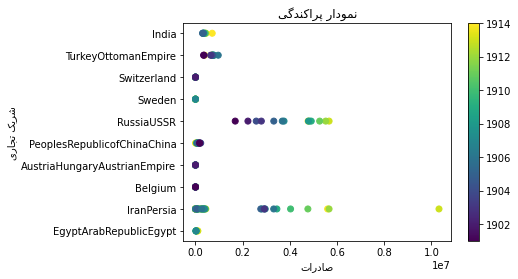

In [ ]:
#@title
plt.scatter(a['export'], a['partner'].astype(str),c=a['year'])
 
# Adding Title to the Plot
plt.title(handle_arabic("نمودار پراکندگی"))
 
# Setting the X and Y labels

plt.xlabel(handle_arabic('صادرات'))
plt.ylabel(handle_arabic('شریک تجاری'))
plt.colorbar()
plt.show()


In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

In [ ]:
import ipywidgets as widgets

slider = widgets.IntSlider(20, min=0, max=100)
slider

In [2]:
import altair as alt
import ipywidgets as widgets
from vega_datasets import data

source = data.stocks()

stock_picker = widgets.SelectMultiple(
    options=source.symbol.unique(),
    value=list(source.symbol.unique()),
    description='Symbols')

# The value of symbols will come from the stock_picker.
@widgets.interact(symbols=stock_picker)
def render(symbols):
  selected = source[source.symbol.isin(list(symbols))]

  return alt.Chart(selected).mark_line().encode(
      x='date',
      y='price',
      color='symbol',
      strokeDash='symbol',
  )

interactive(children=(SelectMultiple(description='Symbols', index=(0, 1, 2, 3, 4), options=('MSFT', 'AMZN', 'I…

In [3]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import IPython
from google.colab import output

def Concat(a, b):
  # Use display.JSON to transfer a structured result.
  return IPython.display.JSON({'result': ' '.join((a, b))})

output.register_callback('notebook.Concat', Concat)

In [ ]:
%%javascript
(async function() {
  const result = await google.colab.kernel.invokeFunction(
    'notebook.Concat', // The callback name.
    ['hello', 'world!'], // The arguments.
    {}); // kwargs
  const text = result.data['application/json'];
  document.querySelector("#output-area").appendChild(document.createTextNode(text.result));
})();

In [4]:
import IPython
from google.colab import output

display(IPython.display.HTML('''
    The items:
    <br><ol id="items"></ol>
    <button id='button'>Click to add</button>
    <script>
      document.querySelector('#button').onclick = () => {
        google.colab.kernel.invokeFunction('notebook.AddListItem', [], {});
      };
    </script>
    '''))

def add_list_item():
  # Use redirect_to_element to direct the elements which are being written.
  with output.redirect_to_element('#items'):
    # Use display to add items which will be persisted on notebook reload.
    display(IPython.display.HTML('<li> Another item</li>'))

output.register_callback('notebook.AddListItem', add_list_item)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import IPython
import uuid
from google.colab import output

class InvokeButton(object):
  def __init__(self, title, callback):
    self._title = title
    self._callback = callback

  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)

    template = """<button id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id)
    return html

def do_something():
  print('here')

InvokeButton('click me', do_something)

here
here


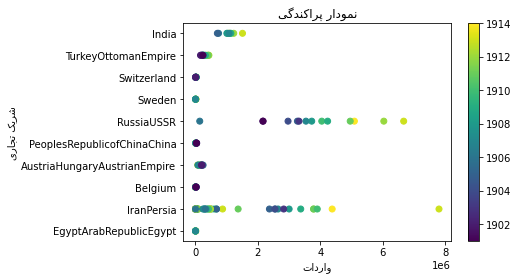

In [ ]:
#@title
plt.scatter(a['import'], a['partner'].astype(str),c=a['year'])
 
# Adding Title to the Plot
plt.title(handle_arabic("نمودار پراکندگی"))
 
# Setting the X and Y labels

plt.xlabel(handle_arabic('واردات'))
plt.ylabel(handle_arabic('شریک تجاری'))
plt.colorbar()
plt.show()

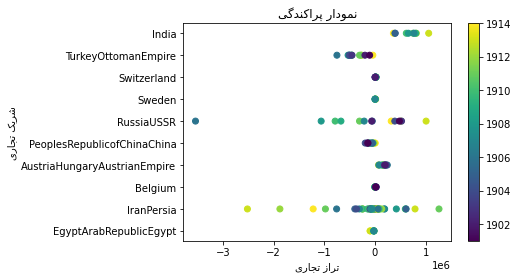

In [ ]:
#@title
plt.scatter(a['import']-a['export'], a['partner'].astype(str),c=a['year'])
 
# Adding Title to the Plot
plt.title(handle_arabic("نمودار پراکندگی"))
 
# Setting the X and Y labels

plt.xlabel(handle_arabic('تراز تجاری'))
plt.ylabel(handle_arabic('شریک تجاری'))
plt.colorbar()
plt.show()

In [ ]:
#@title
import plotly.graph_objects as px

plot = px.Figure(data=[px.Scatter(
    x=data['export'],
    y=data['partner'],
    mode='markers',)
])
plot.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
            direction="down",
        ),
    ]
)
 
plot.show()

In [ ]:
#@title
import plotly.graph_objects as px
import plotly.express as px

b=data[data.partner != 'IranPersia']
fig = px.line(b, x='year',y='import', color='partner')
 
# showing the plot
fig.show()

In [ ]:
#@title
c=data[data.partner != 'IranPersia']
fig = px.line(c, x='year',y='import', color='partner')
 
# showing the plot
fig.show()

In [ ]:
#@title
fig = px.bar(c, x='year',y='export', color='partner')
 
# showing the plot
fig.show()

In [ ]:
#@title
c=data[data.partner != 'IranPersia']
fig = px.bar(c, x='year',y='import', color='partner')
 
# showing the plot
fig.show()

In [ ]:
#@title
c=data[data.partner != 'IranPersia']
d=c['export']-c['import']
fig = px.bar(c, x='year',y=d, color='partner')
 
# showing the plot
fig.show()

In [ ]:
#@title
c=data[data.partner != 'IranPersia']
d=c['export']-c['import']
fig = px.histogram(c, x='year',y=d, color='partner')
 
# showing the plot
fig.show()

In [ ]:
#@title
c=data[data.partner != 'IranPersia']
fig = px.histogram(c, x='year',y='total', color='partner')
 
# showing the plot
fig.show()